# 如何让分布更直观
## 单变量分布

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

### 灰度图
最方便快捷的方式~

In [3]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

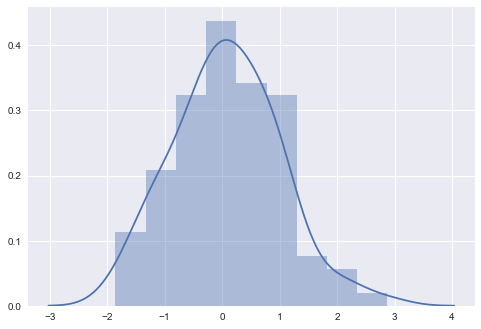

In [4]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True)

想得到更精细的刻画？调节bins~

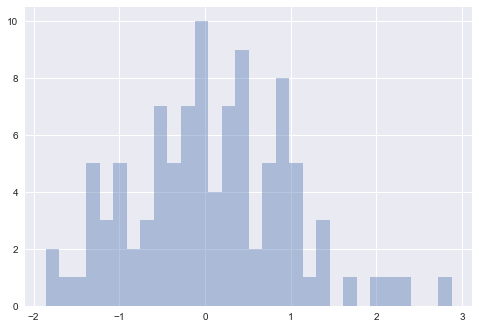

In [5]:
sns.distplot(x, kde=False, bins=30)

想配合着实例一起看？

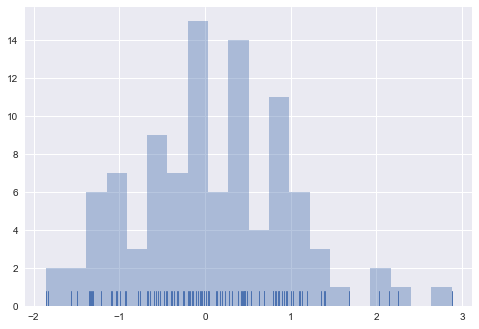

In [4]:
sns.distplot(x, kde=False, bins=20, rug=True)

配合着实例一起看有什么好处？指导你设置合适的bins。

### 核密度估计(KDE)
通过观测估计概率密度函数的形状。
有什么用呢？待定系数法求概率密度函数~

在seaborn中怎么画呢？

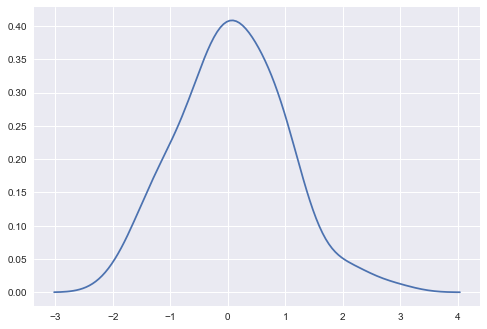

In [5]:
sns.kdeplot(x)

* bandwidth的概念：用于近似的正态分布曲线的宽度
* bandwidth越大，曲线越平缓

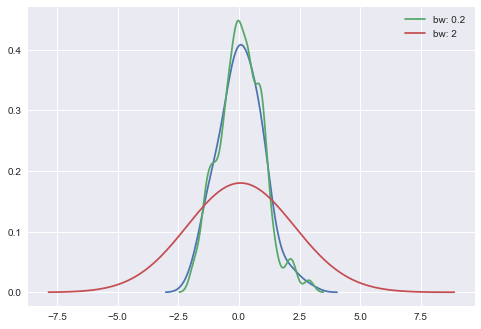

In [6]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

### 模型参数拟合

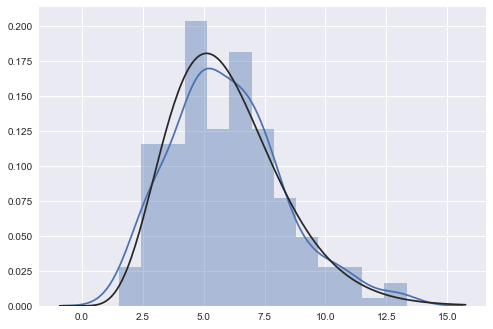

In [7]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, fit=stats.gamma)

## 双变量分布

In [7]:
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [8]:
df

,x,y
0,-0.995328,0.721782
1,-0.944528,0.276843
2,-1.109385,2.246853
3,0.682844,0.023013
4,-0.417883,-0.987145
5,0.933967,1.331390
6,-1.168953,0.613115
7,0.345953,0.898707
8,-0.466411,0.960704
9,-0.591650,0.562268


两个相关的正态分布~
### 散点图

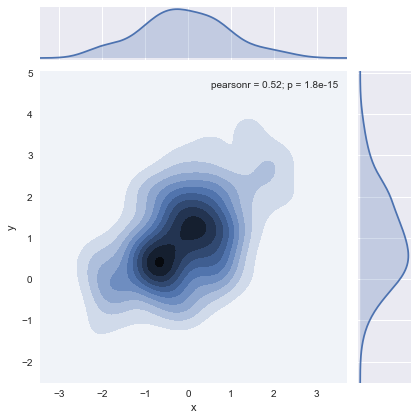

In [9]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

pearson相关系数计算：
* $\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$

### 六角箱图

array([[ 1.02855083, -0.65481751,  0.82751671,  0.25837895,  1.18060827,
        -0.45496236, -0.27098503, -0.5664382 ,  0.46048829, -0.08500428],
       [ 0.7149401 ,  0.03422689,  0.46420951,  2.77642419,  0.93242368,
         0.57894884,  0.4776864 ,  1.76843759,  0.36632696, -0.7448463 ]])

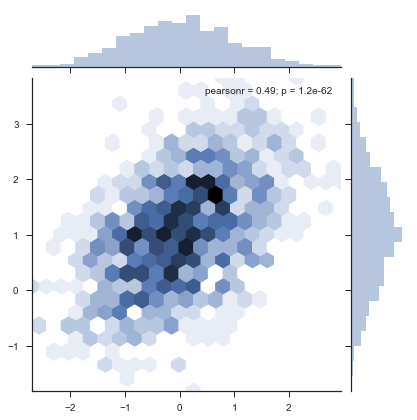

In [10]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")
np.random.multivariate_normal(mean, cov, 10).T

### 核密度估计

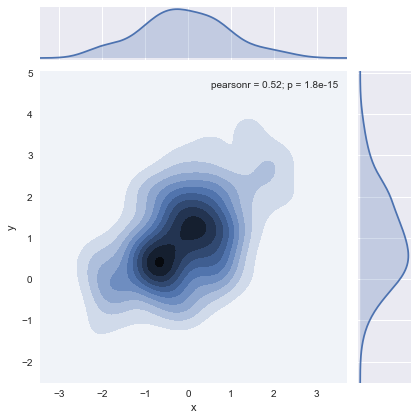

In [11]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

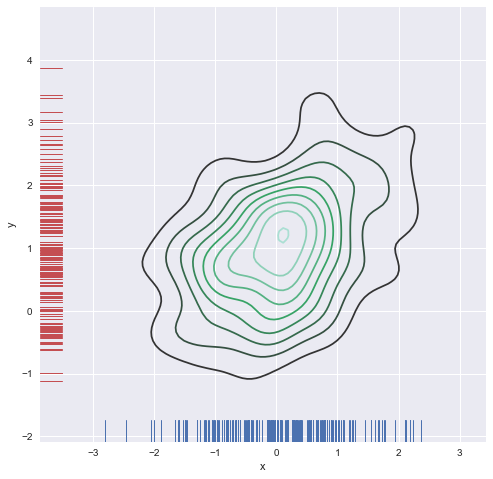

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot(df.x, df.y, ax=ax, shade=False)
sns.rugplot(df.x, color="b", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax, color="r")

想看到更连续梦幻的效果~

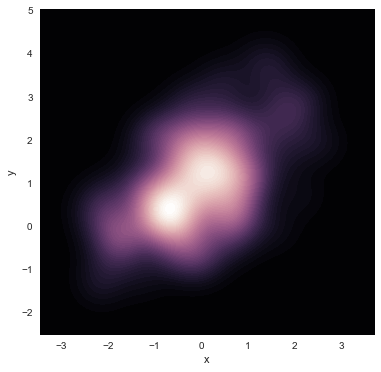

In [13]:
f, ax = plt.subplots(figsize=(6, 6))
# cubehelix颜色系统，亮度正比于强度，用于天文学图像绘制。http://www.mrao.cam.ac.uk/~dag/CUBEHELIX/
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0) # cmap: color map
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

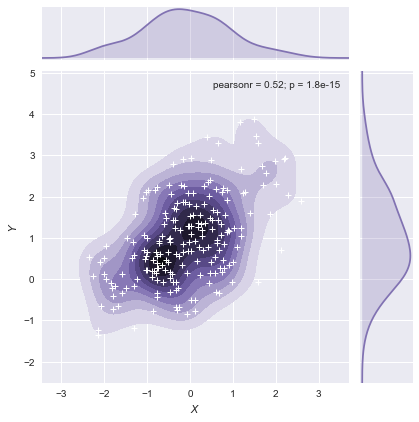

In [14]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0) # 设置中间图片背景的透明度
g.set_axis_labels("$X$", "$Y$") # Latex

## 数据集中的两两关系

In [15]:
iris = sns.load_dataset("iris") # 鸢尾花数据库
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


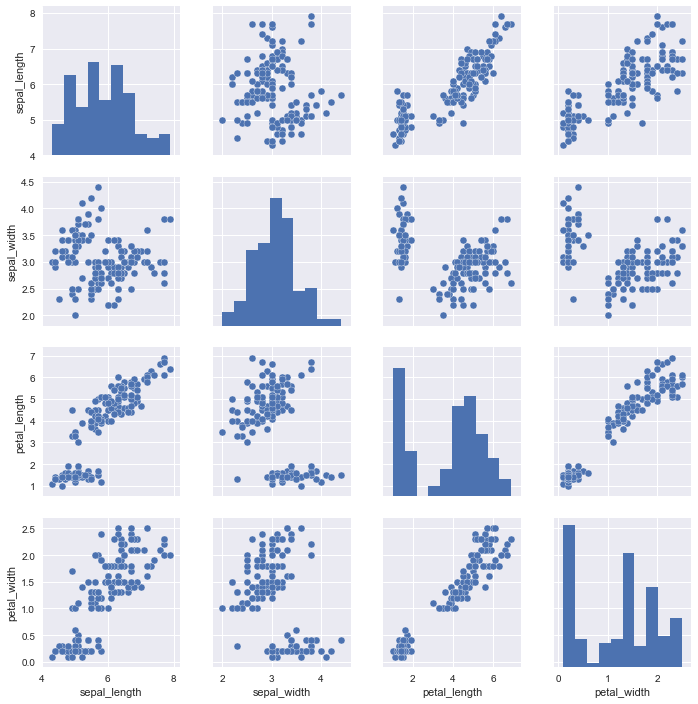

In [16]:
sns.pairplot(iris)

属性两两间的关系 + 属性的灰度图

C:\Users\Bokkin Wang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


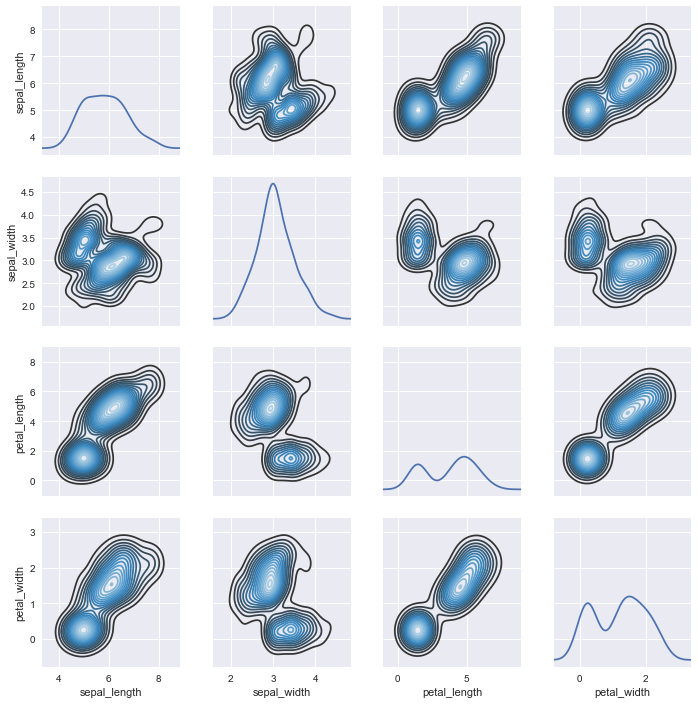

In [17]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20)

## 小结
* distplot(bins, rug)
* kdeplot(bw, fit)
* joinplot(kind)
* pairplot